In [11]:
using LinearAlgebra
using Pkg
using Distributions
using PyPlot

# Question 1


Given the following data of a funciton, we want to find the quadratic spline with 4 knots.

$$(x,y) = (0,0), (1,1), (2,2), (3,1), (4,0)$$


$S_{2,4}(x) =
\begin{cases} a_1 + b_1x + c_1 x^2 &x \in [0,1) \\
a_2 + b_2x + c_2 x^2 &x \in [1,2) \\
a_3 + b_3x + c_3 x^2  &x \in [2,3)\\
a_4 + b_4x + c_4 x^2  &x \in [3,4]\\
\end{cases}$
   
   
Since $S_{2,4}(x)$ interpolates the data, we need

* $a_1 = 0$
* $a_1 + b_1 + c_1 = 1$
* $a_2 + b_2 + c_2 =1$
* $a_2 + b_2 2 + c_2 4 = 2$
* $a_3 + b_3 2 + c_3 4 = 2 $
* $a_3 + b_3 3 + c_3 9=  1 $
* $a_4 + b_4 3 + c_4 9 = 1 $
* $a_4+ b_44 +c_416 = 0$

To ensure the spline is differentiable we need

* $ b_1 + 2c_1 =  b_2 + 2 c_2 $
* $ b_3  + 4c_3  = b_2  + 4c_2  $
* $ b_3 + 6c_3  =  b_4 + 6 c_4$

We focus on the natural spline where 

$c_1 = 0$

We solve the system of equations below

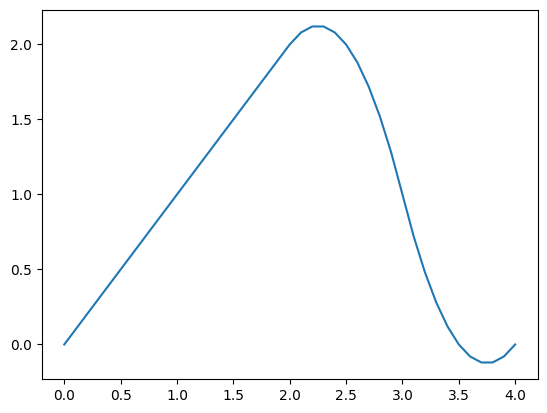

[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, -8.0, 9.0, -2.0, 28.0, -15.0, 2.0]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f497ce38eb8>

In [12]:
X = [1 0 0 0 0 0 0 0 0 0 0 0; 1 1 1 0 0 0 0 0 0 0 0 0; 0 0 0 1 1 1 0 0 0 0 0 0;
    0 0 0 1 2 4 0 0 0 0 0 0;  0 0 0 0 0 0 1 2 4 0 0 0; 0 0 0 0 0 0 1 3 9 0 0 0;
    0 0 0 0 0 0  0 0 0 1 3 9;  0 0 0 0 0 0 0 0 0 1 4 16; 
    0 1 2 0 -1 -2 0 0 0 0 0 0; 0 0 0 0 1 4 0 -1 -4 0 0 0 ; 0 0 0 0 0 0 0 1 6 0 -1 -6 
    ; 0 0 1 0 0 0 0 0 0 0 0 0 ]

y = [0; 1; 1; 2; 2; 1; 1; 0; 0; 0; 0; 0]

C = inv(X)y
println(C)

function spline(x,knots,coefs)
    num_knots = length(knots)
    for i=1:(num_knots-1)
        if x <= knots[i+1]
            return coefs[3*(i-1)+1] + x*coefs[3*(i-1)+2] + x^2*coefs[3*(i-1)+3]
        end
    end
    return coefs[end-2] + x*coefs[end-1] +x^2*coefs[end]
    
end

ys = []
xs = []

for x=0:.1:4
    y = spline(x,[0;1;2;3;4],C)
    xs = append!([x],xs)
    ys = append!([y],ys)
end

plot(xs, ys)

# Question 2

We use the following approximation for an integral $\int_{-1}^1 f(x)dx$,

$$\int_{-1}^1 f(x) dx = w_1 f(-1) + w_2 f(x_1)$$

We construct 3 equations using polynomial expressions of $x$. 

* If $f(x) = x^0$ we get, that (1) $w_1 + w_2 = 2$
* If $f(x) = x$ we get that (2) $\int_{-1}^1 x dx = 0 = w_1x_1 + w_2 x_2$
* $f(x) = x^2$ we get (3) $\int_{-1}^1 x^2 dx = \dfrac{2}{3} = w_1 x_1^2 + w_2 x_2^2 $
* Finally, if $f(x) = x^3$ we get (4) $\int_{-1}^1 x^2 dx = 0 = w_1x_1^3 + w_2 x_2^3 $

So, solving the solution to these three equations we get that $w_1 = 1$, $w_2=1$, $x_1= \dfrac{-1}{\sqrt{3}}$, and $x_2= \dfrac{1}{\sqrt{3}}$

The quadrature formula is thus

$$\int_0^1 f(x)dx = f(\dfrac{-1}{\sqrt{3}}) + f(\dfrac{-1}{\sqrt{3}})$$
 

# Question 3


The formula for Simpson integration is 

$$\int_a^b f(x) dx \approx \frac{(b − a)}6[ f (a) + 4 f \left(\frac{a + b}{2}\right) + f (b)]$$ 




(a) The error formula for Lagrange interpolation is

$$E_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1){!}} (x-x_0) \cdots (x-x_n)$$

$$E_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1){!}} (x-x_0) \cdots (x-x_n)$$

When calculating the error, we note that $M=1$ forms an upper bound on the $n$th derivative of $sin(x)$ because the derivative of $sin(x)$ is $cos(x)$ and the derivative of $cos(x)$ is $-sin(x)$. As a result,

$$E_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1){!}} (x-x_0) \cdots (x-x_n) \leq  (x-x_0) \cdots (x-x_n) $$

We can integrate this formula over the interval to get an estimate of the errror

$$E_n(x) \approx \int_0^1 \cdots (x-x_n) \cdots (x-x_n) dx$$


(b) The error formula in the textbook is

$$E_2(f) = \dfrac{h^5}{90}f^{4}(\xi) $$

Where $h = (a-b)/n$

As a result,

$$h = 1/n$$

And, 

$$E_2(sin(x)) = \dfrac{1}{90n^5}$$


# Question 4


We compute the the integral with a step size of $h=2$ using the following formula

$$N_1(h) = h\left(\frac{1}{2} f(a)+\sum_{k=1}^{n-1}f(a+kh)+\frac{1}{2} f(b)\right)$$

Then we comput the integral with a smaller step size of $h=1$

$$N_1(h) = \dfrac{h}{2} \left(\frac{1}{2} f(a)+\sum_{k=1}^{2n-1}f(a+kh/2)+\frac{1}{2} f(b)\right)$$

The extrapolated error is then given by the following formula

$$\dfrac{N_1(h) - N_1(h/2)}{h^n(2^n-1)} $$

In [9]:
f(x) = exp(x)

function trapezint(f,a,b,N)
    h=(b-a)/N
    sum=(f(a)+f(b))/2
    for k=1:N
        sum = sum + f(a+k*h)
    end
    return sum*h
end

last = 0
for k=1:3
    N = 2^k
    intval = trapezint(f, -1, 1, N)
    println("h: ", N, ", integral: ", intval, ", extrap. error: ", N*N*(last-intval), ",
        extrap. integral: ", (4*intval-last)/3 )
    last=intval
end

h: 2, integral: 5.261362463274288, extrap. error: -21.045449853097153, extrap. integral: 7.0151499510323845
h: 4, integral: 3.758307196843525, extrap. error: 24.048884262892216, extrap. integral: 3.257288774699937
h: 8, integral: 3.0422017906999717, extrap. error: 45.830745993187406, extrap. integral: 2.8034999886521206


# Question 5

Let 

$$A=\{ (x,y):x_2+y_2 \leq 1 \} $$

We want to compute the Area(A) using Monte Carlo Integration. Since, A is circle centered at the origin and of radius 1, we know that the answer is $\pi$ and is given by the following integral

$$Area(A)=\int_A dx dy$$

If $X \sim U(−1,1)$ and $Y \sim U(−1,1)$ are independent random variables with the joint density given by 1/4 i.e. $f_{X,Y}(x,y)=1/4$ for $−1 \leq x,y \leq 1$

Let B be the square $−1 \leq x,y \leq 1$. Then we can think of the Area(A)

$$Area(A)=4P(X,Y∈A)=4\int_B \textbf{1}_A f_{X,Y} dx dy = 4E[\textbf{1}_A]$$

In [2]:
for n=[100,400,1600]
    draws = rand(Uniform(-1,1), 2,n)
    inside_disc = 1 .*(draws[1,:].^2 + draws[2,:].^2 .<= 1)
    println("n: $(n), monte carlo pi: $(4*sum(inside_disc)/n)")
end

n: 100, monte carlo pi: 3.28
n: 400, monte carlo pi: 3.13
n: 1600, monte carlo pi: 3.1725


# Question 6

We solve for the gradient analytically and then stochastic gradient descent to find the optimimum

$$\nabla f_1 = \begin{bmatrix} 2x- 2 &  2y \end{bmatrix}$$
$$\nabla f_2 = \begin{bmatrix} 2x+ 2 &  2y \end{bmatrix}$$
$$\nabla f_3 = \begin{bmatrix} 2x &  2y -2\end{bmatrix}$$
$$\nabla f_4 = \begin{bmatrix} 2x &  2y +2\end{bmatrix}$$

In [112]:
obj = 0 
obj_grad = 0
alpha = .2
obj_grads(x) = [2x[1]-2 2*x[2]; 2x[1]+2 2*x[2] ; 2x[1] 2*x[2]-2 ; 2x[1] 2*x[2]+2 ]

x = [5,5]
for i=1:10
    index = rand(1:4)
    test = false
    
    if test
        println("pre update ", x)
        println(obj_grads(x))
        println(index)
        println(obj_grads(x)[index,:])
        

    end
    x = x - alpha*(obj_grads(x)[index,:])
    
    if test
        println("update ",x)
        println("----")
    end
end

print(x)

[0.167067, 0.181745]